In [3]:
import matplotlib.pyplot as plt
import pandas as pd

reward = pd.read_csv(f'policy_model_deepaaqm_CSMA_5.csv')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


policy_model_deepaaqm_slottedaloha_5.csv
policy_model_deepaaqm_slottedaloha_10.csv
policy_model_deepaaqm_CSMA_5.csv
policy_model_deepaaqm_CSMA_10.csv


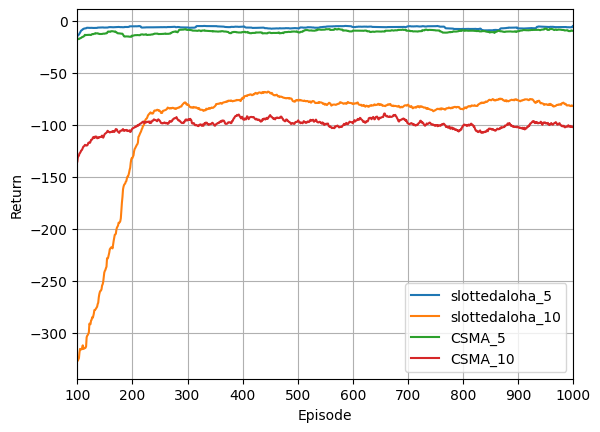

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

n_window = 100
# Plot reward with smoothing
plt.figure()
for raalgo in ["slottedaloha", "CSMA"]:
    for numnode in [5, 10]:
        filename = f'policy_model_deepaaqm_{raalgo}_{numnode}.csv'
        print(filename)
        reward = pd.read_csv(filename)
        plt.plot(reward['reward'].rolling(n_window).mean())

plt.xlabel('Episode')
plt.ylabel('Return')
plt.legend(['slottedaloha_5', 'slottedaloha_10', 'CSMA_5', 'CSMA_10'])
plt.xlim(n_window, 1000)
plt.grid()
# Save figure to eps file
plt.savefig('return.eps', format='eps')

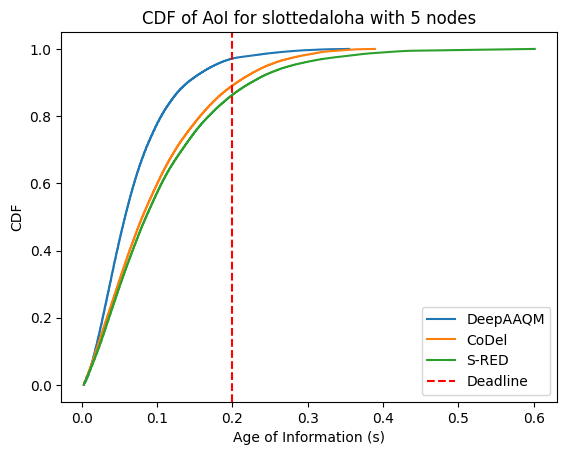

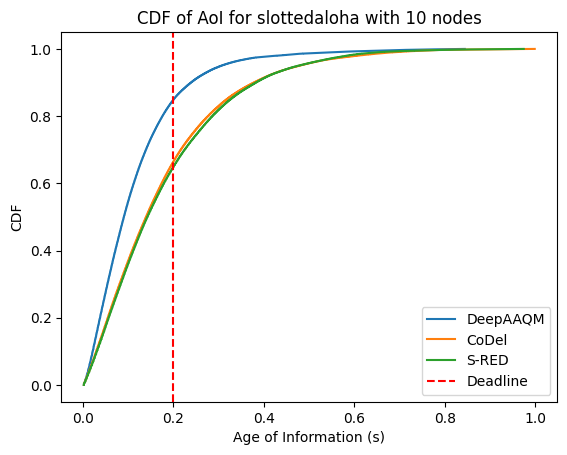

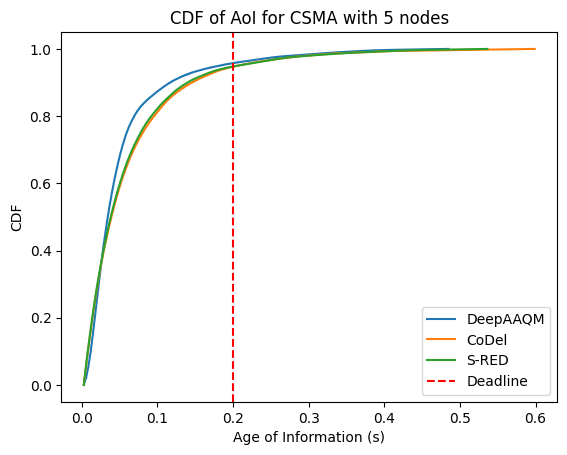

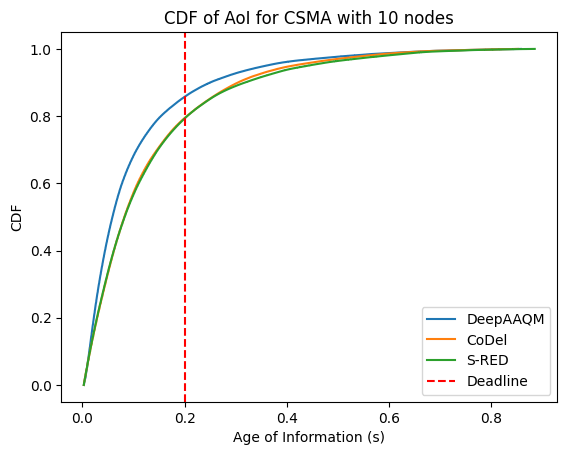

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

raalgos = ["slottedaloha", "CSMA"]
numnodes = [5, 10]

for raalgo in raalgos:
    for numnode in numnodes:
        # Read files
        deepaaqm = pd.read_csv('test_log_deepaaqm_' + raalgo + '_' + str(numnode) + '.csv')
        codel = pd.read_csv('test_log_codel_' + raalgo + '_' + str(numnode) + '.csv')
        sred = pd.read_csv('test_log_sred_' + raalgo + '_' + str(numnode) + '.csv')
        deepaaqm.drop(columns=["Unnamed: 0"], inplace=True)
        codel.drop(columns=["Unnamed: 0"], inplace=True)
        sred.drop(columns=["Unnamed: 0"], inplace=True)
        
        # Make 1D array that contains all aois of the dataframe
        aois_deepaaqm = deepaaqm.iloc[:, 7:].values.flatten()
        aois_codel = codel.iloc[:, 7:].values.flatten()
        aois_sred = sred.iloc[:, 7:].values.flatten()
               
        # Plot CDF of aois with smoothing
        plt.figure()
        plt.plot(sorted(aois_deepaaqm), pd.Series(range(len(aois_deepaaqm)))/float(len(aois_deepaaqm)), label='DeepAAQM')
        plt.plot(sorted(aois_codel), pd.Series(range(len(aois_codel)))/float(len(aois_codel)), label='CoDel')
        plt.plot(sorted(aois_sred), pd.Series(range(len(aois_sred)))/float(len(aois_sred)), label='SRED')
        # Vertical bar at 0.2
        plt.axvline(x=0.2, color='r', linestyle='--')
        plt.xlabel('Age of Information (s)')
        plt.ylabel('CDF')
        plt.title('CDF of AoI for ' + raalgo + ' with ' + str(numnode) + ' nodes')
        plt.legend(loc='lower right')
        plt.savefig('cdf_' + raalgo + '_' + str(numnode) + '.png')